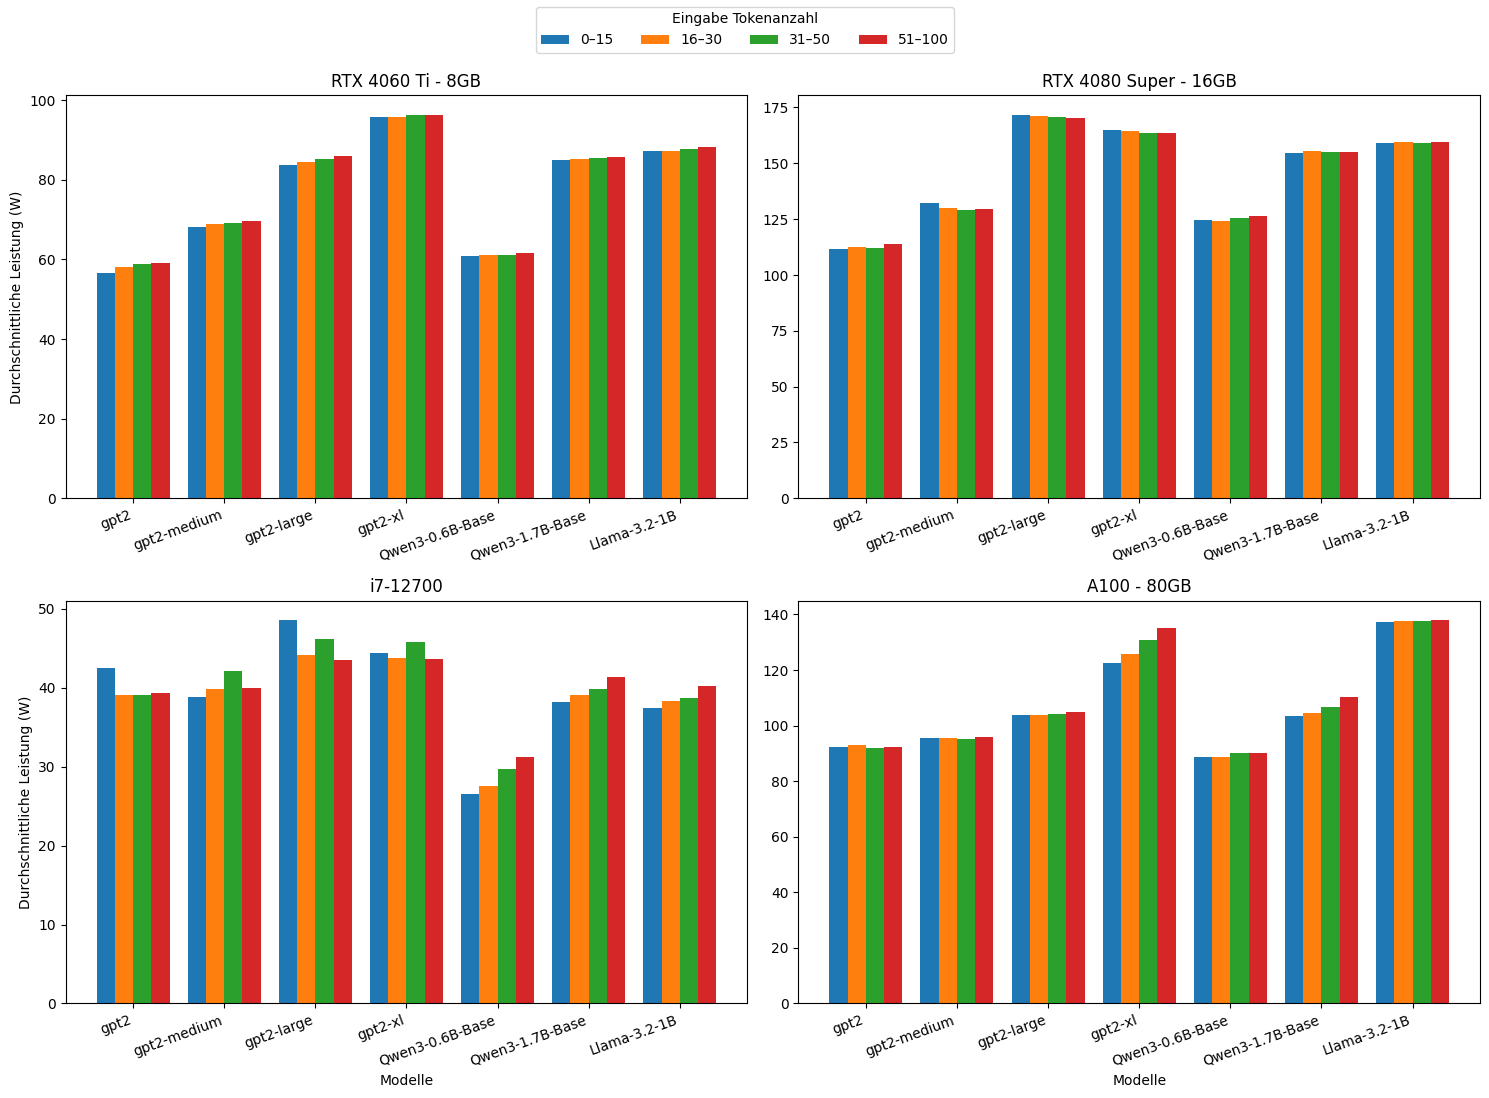

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

params = {
    "RTX 4060 Ti - 8GB": [
        {"path":"../output/office/openai-community_gpt2/batch-size1_token128/energy.csv", "plot_key":"gpu_energy(J)", "model":"gpt2"},
        {"path":"../output/office/openai-community_gpt2-medium/batch-size1_token128/energy.csv", "plot_key":"gpu_energy(J)", "model":"gpt2-medium"},
        {"path":"../output/office/openai-community_gpt2-large/batch-size1_token128/energy.csv", "plot_key":"gpu_energy(J)", "model":"gpt2-large"},
        {"path":"../output/office/openai-community_gpt2-xl/batch-size1_token128/energy.csv", "plot_key":"gpu_energy(J)", "model":"gpt2-xl"},
        {"path":"../output/office/Qwen_Qwen3-0.6B-Base/batch-size1_token128/energy.csv", "plot_key":"gpu_energy(J)", "model":"Qwen3-0.6B-Base"},
        {"path":"../output/office/Qwen_Qwen3-1.7B-Base/batch-size1_token128/energy.csv", "plot_key":"gpu_energy(J)", "model":"Qwen3-1.7B-Base"},
        {"path":"../output/office/meta-llama_Llama-3.2-1B/batch-size1_token128/energy.csv", "plot_key":"gpu_energy(J)", "model":"Llama-3.2-1B"},
    ],
    "RTX 4080 Super - 16GB": [
        {"path":"../output/gaming/openai-community_gpt2/batch-size1_token128/energy.csv", "plot_key":"gpu_energy(J)", "model":"gpt2"},
        {"path":"../output/gaming/openai-community_gpt2-medium/batch-size1_token128/energy.csv", "plot_key":"gpu_energy(J)", "model":"gpt2-medium"},
        {"path":"../output/gaming/openai-community_gpt2-large/batch-size1_token128/energy.csv", "plot_key":"gpu_energy(J)", "model":"gpt2-large"},
        {"path":"../output/gaming/openai-community_gpt2-xl/batch-size1_token128/energy.csv", "plot_key":"gpu_energy(J)", "model":"gpt2-xl"},
        {"path":"../output/gaming/Qwen_Qwen3-0.6B-Base/batch-size1_token128/energy.csv", "plot_key":"gpu_energy(J)", "model":"Qwen3-0.6B-Base"},
        {"path":"../output/gaming/Qwen_Qwen3-1.7B-Base/batch-size1_token128/energy.csv", "plot_key":"gpu_energy(J)", "model":"Qwen3-1.7B-Base"},
        {"path":"../output/gaming/meta-llama_Llama-3.2-1B/batch-size1_token128/energy.csv", "plot_key":"gpu_energy(J)", "model":"Llama-3.2-1B"},
    ],
    "i7-12700": [
        {"path":"../output/office_fh/openai-community_gpt2/batch-size1_token16/energy.csv", "plot_key":"cpu_energy(J)", "model":"gpt2"},
        {"path":"../output/office_fh/openai-community_gpt2-medium/batch-size1_token16/energy.csv", "plot_key":"cpu_energy(J)", "model":"gpt2-medium"},
        {"path":"../output/office_fh/openai-community_gpt2-large/batch-size1_token16/energy.csv", "plot_key":"cpu_energy(J)", "model":"gpt2-large"},
        {"path":"../output/office_fh/openai-community_gpt2-xl/batch-size1_token16/energy.csv", "plot_key":"cpu_energy(J)", "model":"gpt2-xl"},
        {"path":"../output/office_fh/Qwen_Qwen3-0.6B-Base/batch-size1_token16/energy.csv", "plot_key":"cpu_energy(J)", "model":"Qwen3-0.6B-Base"},
        {"path":"../output/office_fh/Qwen_Qwen3-1.7B-Base/batch-size1_token16/energy.csv", "plot_key":"cpu_energy(J)", "model":"Qwen3-1.7B-Base"},
        {"path":"../output/office_fh/meta-llama_Llama-3.2-1B/batch-size1_token16/energy.csv", "plot_key":"cpu_energy(J)", "model":"Llama-3.2-1B"},
    ],
    "A100 - 80GB": [
        {"path":"../output/server/openai-community_gpt2/batch-size1_token128/energy.csv", "plot_key":"gpu_energy(J)", "model":"gpt2"},
        {"path":"../output/server/openai-community_gpt2-medium/batch-size1_token128/energy.csv", "plot_key":"gpu_energy(J)", "model":"gpt2-medium"},
        {"path":"../output/server/openai-community_gpt2-large/batch-size1_token128/energy.csv", "plot_key":"gpu_energy(J)", "model":"gpt2-large"},
        {"path":"../output/server/openai-community_gpt2-xl/batch-size1_token128/energy.csv", "plot_key":"gpu_energy(J)", "model":"gpt2-xl"},
        {"path":"../output/server/Qwen_Qwen3-0.6B-Base/batch-size1_token128/energy.csv", "plot_key":"gpu_energy(J)", "model":"Qwen3-0.6B-Base"},
        {"path":"../output/server/Qwen_Qwen3-1.7B-Base/batch-size1_token128/energy.csv", "plot_key":"gpu_energy(J)", "model":"Qwen3-1.7B-Base"},
        {"path":"../output/server/meta-llama_Llama-3.2-1B/batch-size1_token128/energy.csv", "plot_key":"gpu_energy(J)", "model":"Llama-3.2-1B"},
    ]
}

intervals = ["0–15", "16–30", "31–50", "51–100"]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

fig, axes = plt.subplots(2, 2, figsize=(15, 11))
axes = axes.flatten()

for idx, (ax, (computer, configs)) in enumerate(zip(axes, params.items())):
    results = []

    for param in configs:
        df = pd.read_csv(param["path"], delimiter=";")
        df["start"] = pd.to_datetime(df["start"], unit="s", utc=True)
        df["start"] = df["start"].dt.tz_convert("Europe/Berlin").dt.tz_localize(None)
        df["end"] = pd.to_datetime(df["end"], unit="s", utc=True)
        df["end"] = df["end"].dt.tz_convert("Europe/Berlin").dt.tz_localize(None)

        values = []
        for i in range(4):
            start = i * 250
            end = (i + 1) * 250
            val = df[start:end][param["plot_key"]].sum() / df[start:end]["time(s)"].sum()
            values.append(val)

        results.append({"model": param["model"], "values": values})

    bar_width = 0.2
    x = np.arange(len(results))

    show_legend = (idx == 0)
    for i in range(4):
        ax.bar(
            x + i*bar_width,
            [r["values"][i] for r in results],
            width=bar_width,
            color=colors[i],
            label=intervals[i] if show_legend else None
        )

    ax.set_xticks(x + 1.5*bar_width)
    ax.set_xticklabels([r["model"] for r in results], rotation=20, ha="right")
    ax.set_title(computer)

    row, col = divmod(idx, 2)
    ax.set_xlabel("Modelle" if row == 1 else "")
    ax.set_ylabel("Durchschnittliche Leistung (W)" if col == 0 else "")

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Eingabe Tokenanzahl", loc="upper center", ncol=4)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [14]:
params = {
    "RTX 4060 Ti - 8GB": [
        {"path":"../output/office/openai-community_gpt2/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"gpt2"},
        {"path":"../output/office/openai-community_gpt2-medium/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"gpt2-medium"},
        {"path":"../output/office/openai-community_gpt2-large/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"gpt2-large"},
        {"path":"../output/office/openai-community_gpt2-xl/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"gpt2-xl"},
        {"path":"../output/office/Qwen_Qwen3-0.6B-Base/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"Qwen3-0.6B-Base"},
        {"path":"../output/office/Qwen_Qwen3-1.7B-Base/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"Qwen3-1.7B-Base"},
        {"path":"../output/office/meta-llama_Llama-3.2-1B/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"Llama-3.2-1B"},
    ],
    "RTX 4080 Super - 16GB": [
        {"path":"../output/gaming/openai-community_gpt2/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"gpt2"},
        {"path":"../output/gaming/openai-community_gpt2-medium/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"gpt2-medium"},
        {"path":"../output/gaming/openai-community_gpt2-large/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"gpt2-large"},
        {"path":"../output/gaming/openai-community_gpt2-xl/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"gpt2-xl"},
        {"path":"../output/gaming/Qwen_Qwen3-0.6B-Base/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"Qwen3-0.6B-Base"},
        {"path":"../output/gaming/Qwen_Qwen3-1.7B-Base/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"Qwen3-1.7B-Base"},
        {"path":"../output/gaming/meta-llama_Llama-3.2-1B/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"Llama-3.2-1B"},
    ],
    "i7-12700": [
        {"path":"../output/office_fh/openai-community_gpt2/summary.csv", "plot_key":"total_cpu_energy(J)", "model":"gpt2"},
        {"path":"../output/office_fh/openai-community_gpt2-medium/summary.csv", "plot_key":"total_cpu_energy(J)", "model":"gpt2-medium"},
        {"path":"../output/office_fh/openai-community_gpt2-large/summary.csv", "plot_key":"total_cpu_energy(J)", "model":"gpt2-large"},
        {"path":"../output/office_fh/openai-community_gpt2-xl/summary.csv", "plot_key":"total_cpu_energy(J)", "model":"gpt2-xl"},
        {"path":"../output/office_fh/Qwen_Qwen3-0.6B-Base/summary.csv", "plot_key":"total_cpu_energy(J)", "model":"Qwen3-0.6B-Base"},
        {"path":"../output/office_fh/Qwen_Qwen3-1.7B-Base/summary.csv", "plot_key":"total_cpu_energy(J)", "model":"Qwen3-1.7B-Base"},
        {"path":"../output/office_fh/meta-llama_Llama-3.2-1B/summary.csv", "plot_key":"total_cpu_energy(J)", "model":"Llama-3.2-1B"},
    ],
    "A100 - 80GB": [
        {"path":"../output/server/openai-community_gpt2/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"gpt2"},
        {"path":"../output/server/openai-community_gpt2-medium/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"gpt2-medium"},
        {"path":"../output/server/openai-community_gpt2-large/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"gpt2-large"},
        {"path":"../output/server/openai-community_gpt2-xl/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"gpt2-xl"},
        {"path":"../output/server/Qwen_Qwen3-0.6B-Base/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"Qwen3-0.6B-Base"},
        {"path":"../output/server/Qwen_Qwen3-1.7B-Base/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"Qwen3-1.7B-Base"},
        {"path":"../output/server/meta-llama_Llama-3.2-1B/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"Llama-3.2-1B"},
    ]
}

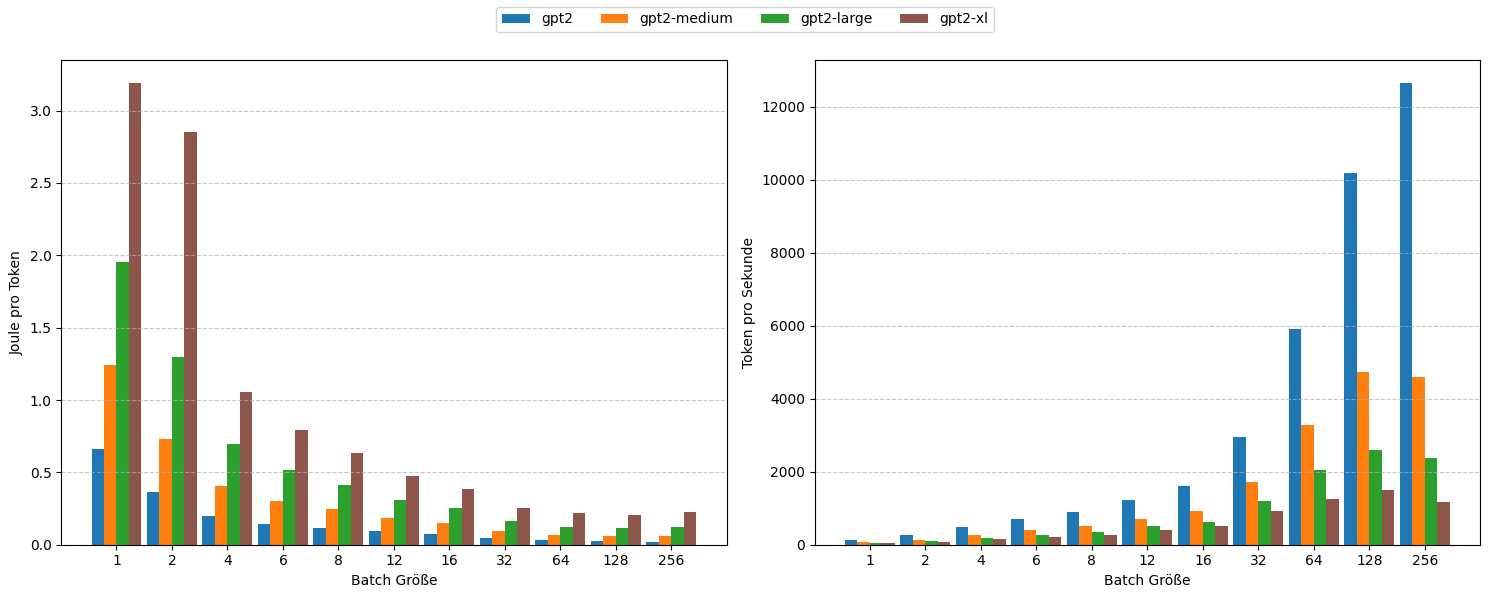

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib.patches import Patch

MODELS = [
    "gpt2",
    "gpt2-medium",
    "gpt2-large",
    "Qwen3-0.6B-Base",
    "Llama-3.2-1B",
    "gpt2-xl",
    "Qwen3-1.7B-Base",
]
cmap = mpl.colormaps.get_cmap("tab10")
MODEL_COLOR = {m: cmap(i % 10) for i, m in enumerate(MODELS)}

device = "A100 - 80GB"
paths = params[device]

all_batch_sizes = set()
energy_data = {}
speed_data  = {}

for p in paths:
    df = pd.read_csv(p["path"], delimiter=";")
    energy_data[p["model"]] = dict(zip(df["batch_size"], df[p["plot_key"]] / df["total_tokens"]))
    speed_data[p["model"]]  = dict(zip(df["batch_size"], df["total_tokens"] / df["total_time(s)"]))
    all_batch_sizes.update(df["batch_size"])

batch_sizes_sorted = sorted(all_batch_sizes)
x = np.arange(len(batch_sizes_sorted))

models_present = [m for m in MODELS if m in energy_data]
n_models = len(models_present)
bar_width = 0.9 / n_models if n_models > 0 else 0.9
offsets = (np.arange(n_models) - (n_models - 1) / 2) * bar_width

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharex=True)

ax_left = axes[0]
for j, m in enumerate(models_present):
    vals = [energy_data[m].get(bs, 0) for bs in batch_sizes_sorted]
    ax_left.bar(x + offsets[j], vals, width=bar_width, color=MODEL_COLOR[m], label=m)

ax_left.set_ylabel("Joule pro Token")
ax_left.set_xticks(x, batch_sizes_sorted)
ax_left.set_xlabel("Batch Größe")
ax_left.grid(axis="y", linestyle="--", alpha=0.7)

ax_right = axes[1]
for j, m in enumerate(models_present):
    vals = [speed_data[m].get(bs, 0) for bs in batch_sizes_sorted]
    ax_right.bar(x + offsets[j], vals, width=bar_width, color=MODEL_COLOR[m], label=m)

ax_right.set_ylabel("Token pro Sekunde")
ax_right.set_xticks(x, batch_sizes_sorted)
ax_right.set_xlabel("Batch Größe")
ax_right.grid(axis="y", linestyle="--", alpha=0.7)

handles = [Patch(facecolor=MODEL_COLOR[m], label=m) for m in models_present]
fig.legend(handles=handles, labels=models_present, loc="upper center", ncol=len(models_present))

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


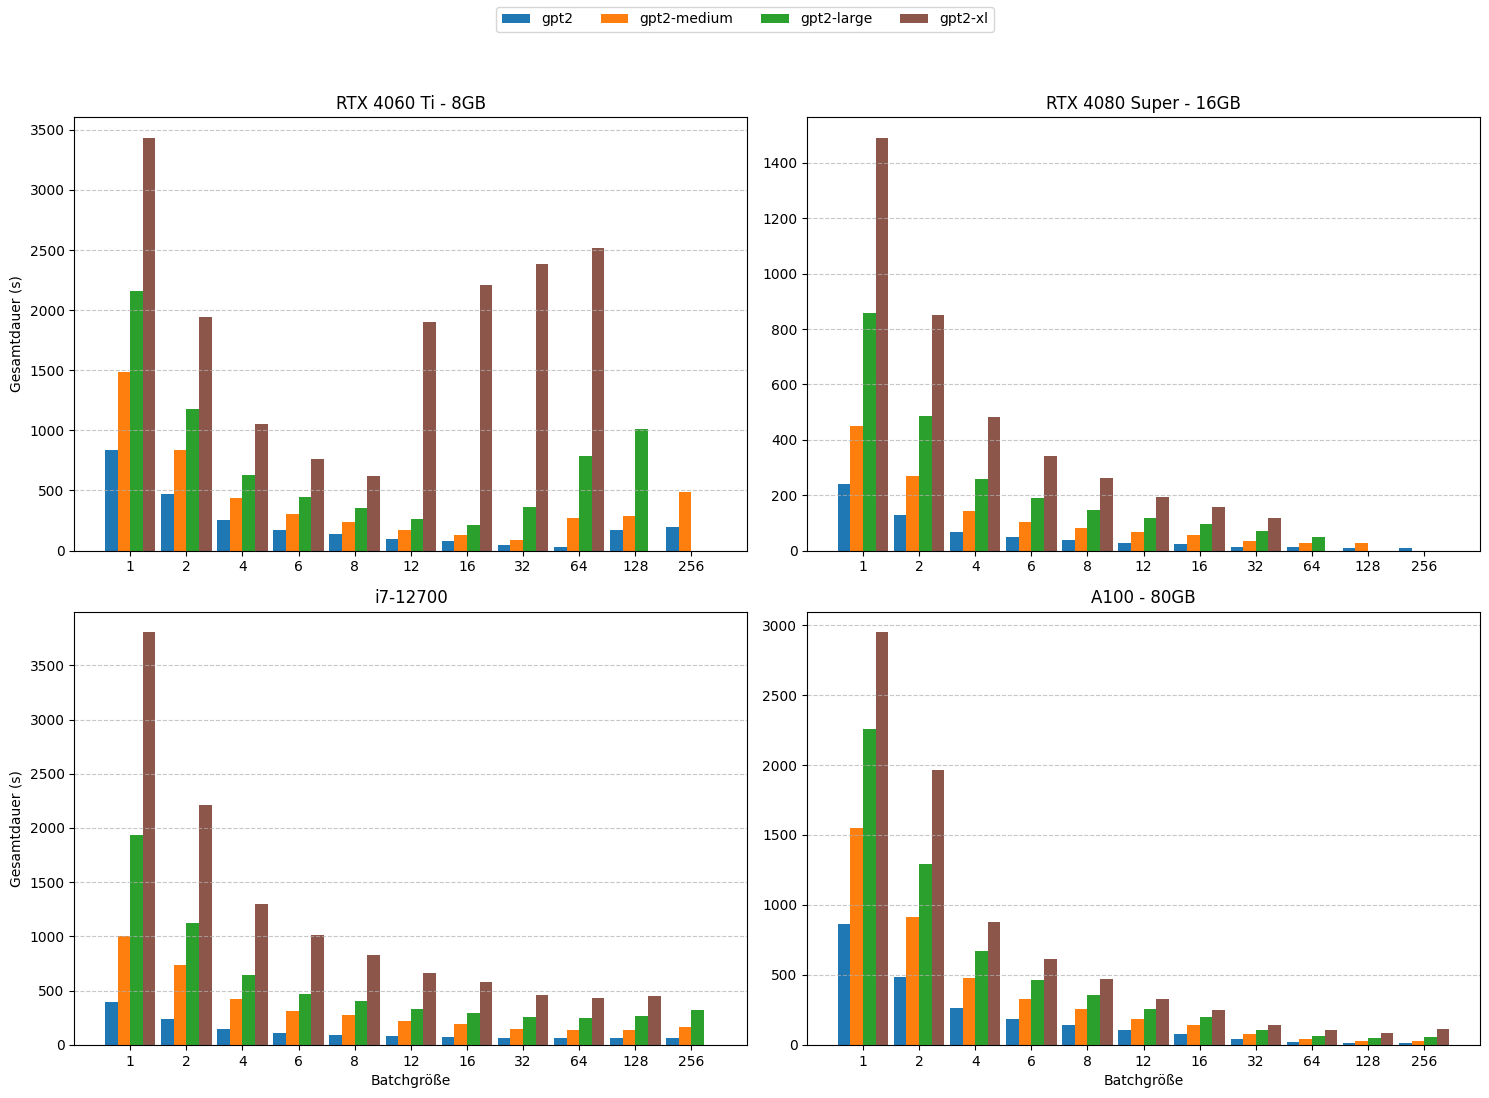

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib.patches import Patch

MODELS = [
    "gpt2",
    "gpt2-medium",
    "gpt2-large",
    "Qwen3-0.6B-Base",
    "Llama-3.2-1B",
    "gpt2-xl",
    "Qwen3-1.7B-Base",
]
cmap = mpl.colormaps.get_cmap("tab10")
MODEL_COLOR = {model: cmap(i % 10) for i, model in enumerate(MODELS)}

devices_to_plot = ["RTX 4060 Ti - 8GB", "RTX 4080 Super - 16GB", "i7-12700", "A100 - 80GB"]

fig, axes = plt.subplots(2, 2, figsize=(15, 11), sharex=False, sharey=False)

models_used = set()

for idx, device in enumerate(devices_to_plot):
    row, col = divmod(idx, 2)
    ax = axes[row, col]
    paths = params[device]

    all_batch_sizes = set()
    time_data = {}
    for p in paths:
        df = pd.read_csv(p["path"], delimiter=";")
        time_data[p["model"]] = dict(zip(df["batch_size"], df["total_time(s)"]))
        all_batch_sizes.update(df["batch_size"])

    batch_sizes_sorted = sorted(all_batch_sizes)
    x = np.arange(len(batch_sizes_sorted))

    models_present = [m for m in MODELS if m in time_data]
    models_used.update(models_present)

    n_models = max(len(models_present), 1)
    bar_width = 0.9 / n_models
    offsets = (np.arange(n_models) - (n_models - 1) / 2) * bar_width

    for j, m in enumerate(models_present):
        vals = [time_data[m].get(bs, 0) for bs in batch_sizes_sorted]
        ax.bar(x + offsets[j], vals, width=bar_width, color=MODEL_COLOR[m], label=m)

    ax.set_title(device)
    ax.set_xticks(x, batch_sizes_sorted)
    ax.grid(axis="y", linestyle="--", alpha=0.7)

    if col == 0:
        ax.set_ylabel("Gesamtdauer (s)")
    if row == 1:
        ax.set_xlabel("Batchgröße")

legend_models = [m for m in MODELS if m in models_used]
handles = [Patch(facecolor=MODEL_COLOR[m], label=m) for m in legend_models]
fig.legend(handles=handles, labels=legend_models, loc="upper center", ncol=len(legend_models))

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


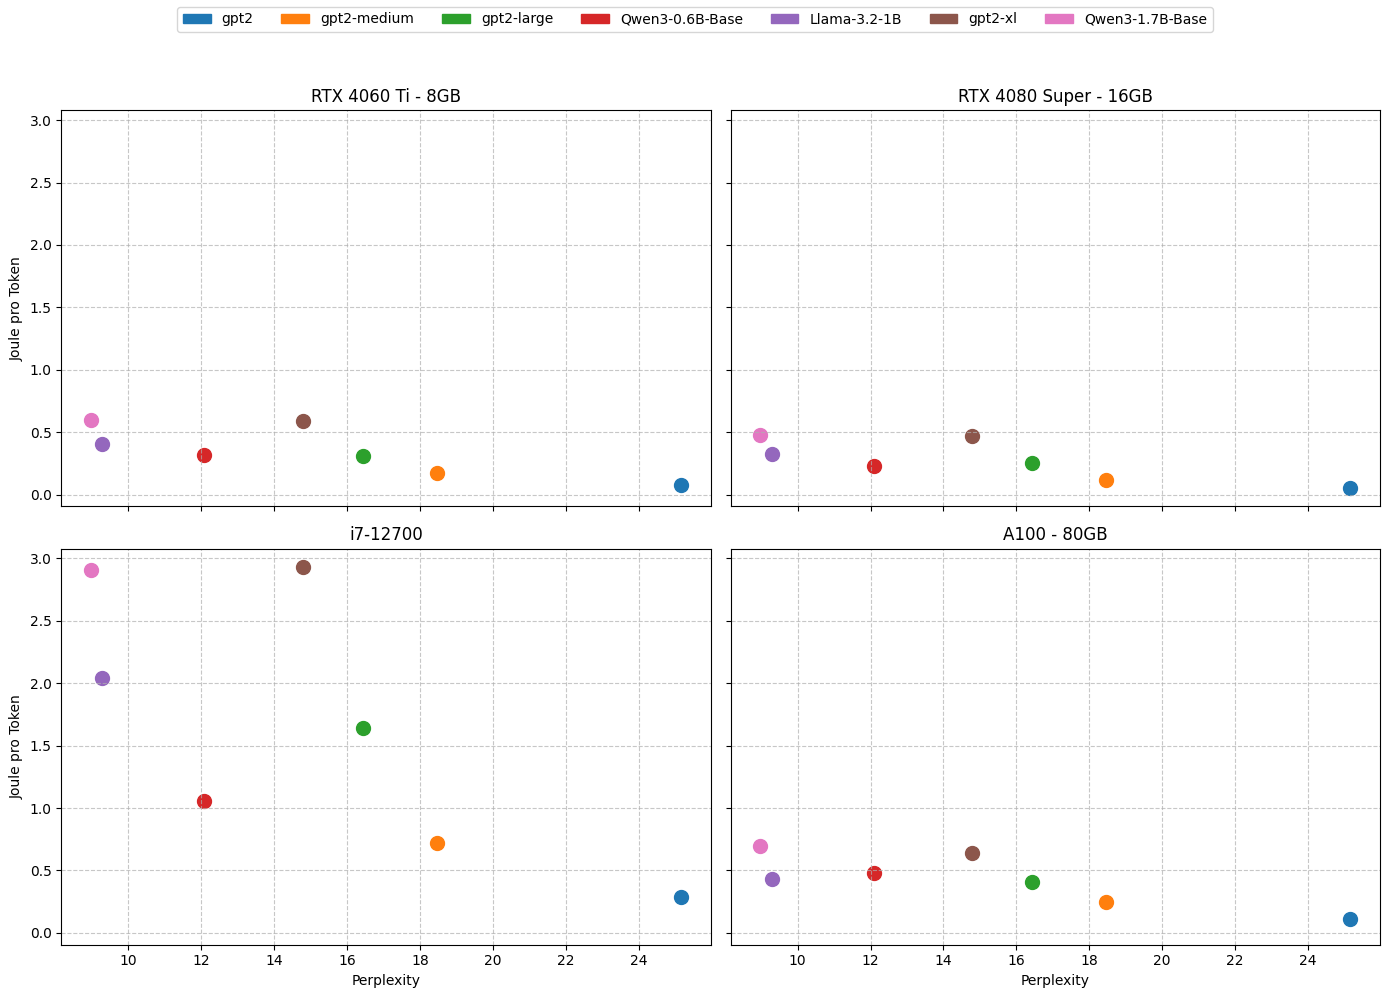

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib.patches import Patch

MODELS = [
    "gpt2",
    "gpt2-medium",
    "gpt2-large",
    "Qwen3-0.6B-Base",
    "Llama-3.2-1B",
    "gpt2-xl",
    "Qwen3-1.7B-Base",
]
cmap = mpl.colormaps.get_cmap("tab10")
MODEL_COLOR = {m: cmap(i % 10) for i, m in enumerate(MODELS)}

model_perplexity = {
    "gpt2": 25.170398712158203,
    "gpt2-medium": 18.462858200073242,
    "gpt2-large": 16.44430923461914,
    "gpt2-xl": 14.787765502929688,
    "Qwen3-0.6B-Base": 12.088821411132812,
    "Qwen3-1.7B-Base": 8.969512939453125,
    "Llama-3.2-1B": 9.282837867736816,
}

devices_to_plot = ["RTX 4060 Ti - 8GB", "RTX 4080 Super - 16GB", "i7-12700", "A100 - 80GB"]

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)

models_used = set()

for idx, device in enumerate(devices_to_plot):
    row, col = divmod(idx, 2)
    ax = axes[row, col]
    paths = params[device]

    for entry in paths:
        model = entry["model"]
        if model not in model_perplexity:
            continue

        df = pd.read_csv(entry["path"], delimiter=";")
        row_df = df[df["batch_size"] == 8]
        if row_df.empty:
            continue

        energy = float(row_df[entry["plot_key"]].values[0])
        tokens = float(row_df["total_tokens"].values[0])
        jpt = energy / tokens if tokens > 0 else np.nan
        perp = model_perplexity[model]

        ax.scatter(perp, jpt, color=MODEL_COLOR[model], s=100)
        models_used.add(model)

    ax.set_title(device)
    ax.grid(True, linestyle="--", alpha=0.7)

    if col == 0:
        ax.set_ylabel("Joule pro Token")
    if row == 1:
        ax.set_xlabel("Perplexity")

models_ordered = [m for m in MODELS if m in models_used]
handles = [Patch(color=MODEL_COLOR[m], label=m) for m in models_ordered]
fig.legend(handles=handles, loc="upper center", ncol=len(models_ordered))

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


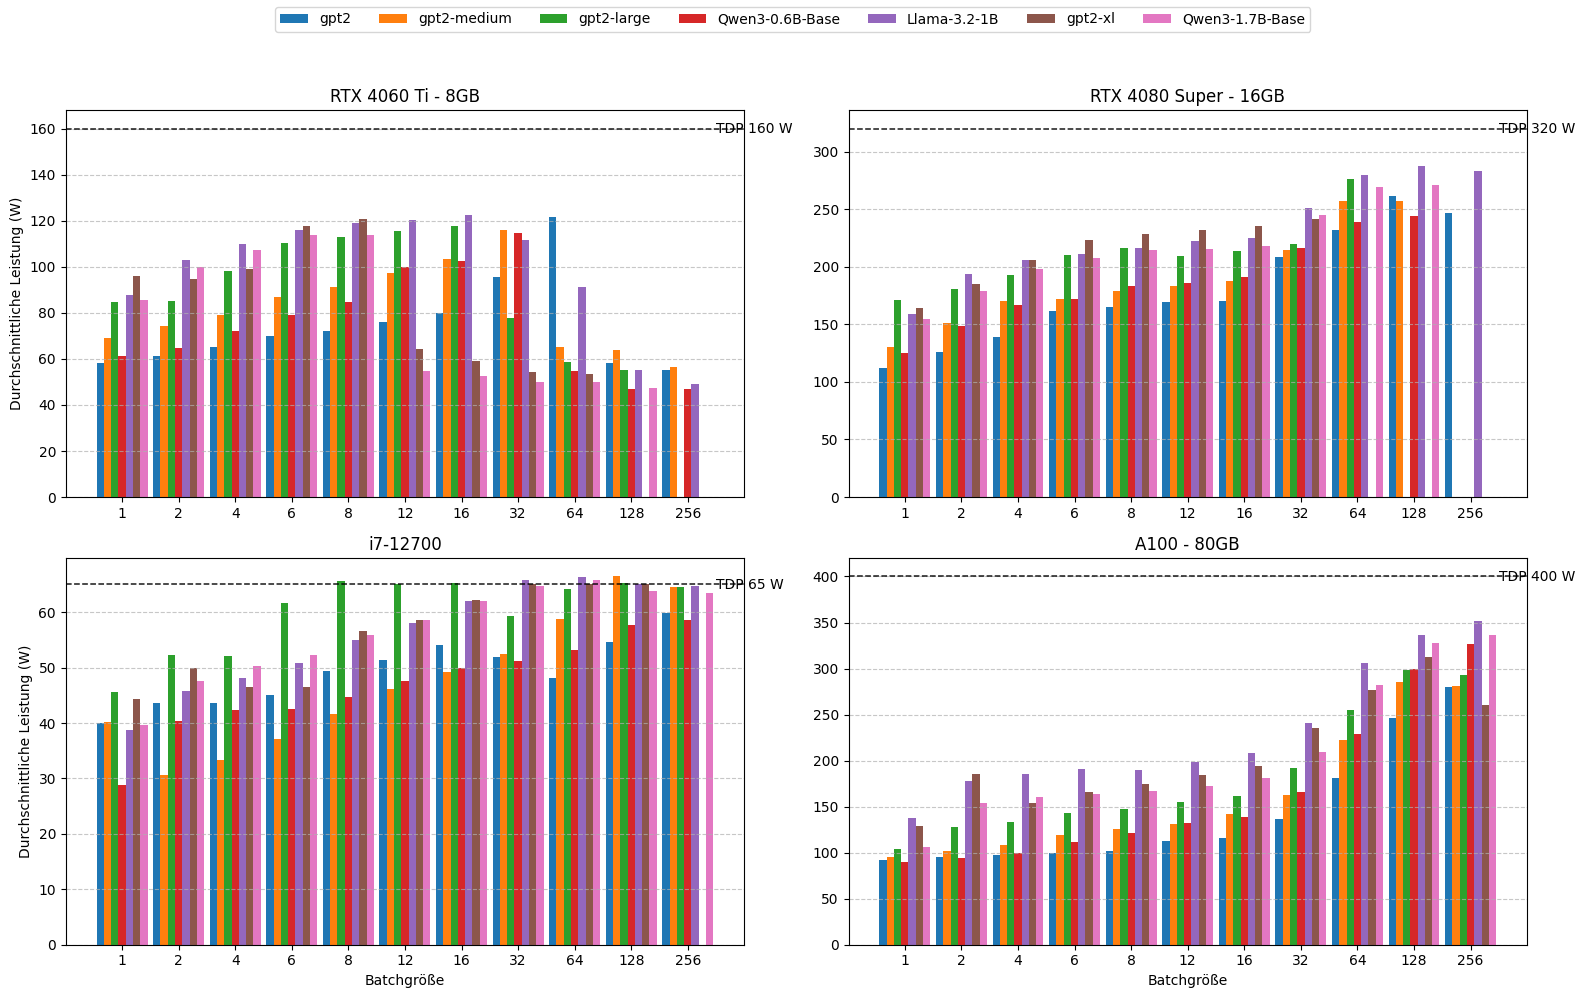

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib.patches import Patch

params = {
    "RTX 4060 Ti - 8GB": { "config" : [
        {"path":"../output/office/openai-community_gpt2/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"gpt2"},
        {"path":"../output/office/openai-community_gpt2-medium/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"gpt2-medium"},
        {"path":"../output/office/openai-community_gpt2-large/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"gpt2-large"},
        {"path":"../output/office/openai-community_gpt2-xl/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"gpt2-xl"},
        {"path":"../output/office/Qwen_Qwen3-0.6B-Base/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"Qwen3-0.6B-Base"},
        {"path":"../output/office/Qwen_Qwen3-1.7B-Base/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"Qwen3-1.7B-Base"},
        {"path":"../output/office/meta-llama_Llama-3.2-1B/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"Llama-3.2-1B"},
    ],
        "tdp" : "160"
    },
    "RTX 4080 Super - 16GB": { "config" : [
        {"path":"../output/gaming/openai-community_gpt2/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"gpt2"},
        {"path":"../output/gaming/openai-community_gpt2-medium/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"gpt2-medium"},
        {"path":"../output/gaming/openai-community_gpt2-large/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"gpt2-large"},
        {"path":"../output/gaming/openai-community_gpt2-xl/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"gpt2-xl"},
        {"path":"../output/gaming/Qwen_Qwen3-0.6B-Base/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"Qwen3-0.6B-Base"},
        {"path":"../output/gaming/Qwen_Qwen3-1.7B-Base/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"Qwen3-1.7B-Base"},
        {"path":"../output/gaming/meta-llama_Llama-3.2-1B/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"Llama-3.2-1B"},
    ],
        "tdp" : "320"
    },
    "i7-12700": { "config" : [
        {"path":"../output/office_fh/openai-community_gpt2/summary.csv", "plot_key":"total_cpu_energy(J)", "model":"gpt2"},
        {"path":"../output/office_fh/openai-community_gpt2-medium/summary.csv", "plot_key":"total_cpu_energy(J)", "model":"gpt2-medium"},
        {"path":"../output/office_fh/openai-community_gpt2-large/summary.csv", "plot_key":"total_cpu_energy(J)", "model":"gpt2-large"},
        {"path":"../output/office_fh/openai-community_gpt2-xl/summary.csv", "plot_key":"total_cpu_energy(J)", "model":"gpt2-xl"},
        {"path":"../output/office_fh/Qwen_Qwen3-0.6B-Base/summary.csv", "plot_key":"total_cpu_energy(J)", "model":"Qwen3-0.6B-Base"},
        {"path":"../output/office_fh/Qwen_Qwen3-1.7B-Base/summary.csv", "plot_key":"total_cpu_energy(J)", "model":"Qwen3-1.7B-Base"},
        {"path":"../output/office_fh/meta-llama_Llama-3.2-1B/summary.csv", "plot_key":"total_cpu_energy(J)", "model":"Llama-3.2-1B"},
    ],
        "tdp" : "65"
    },
    "A100 - 80GB": { "config" : [
        {"path":"../output/server/openai-community_gpt2/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"gpt2"},
        {"path":"../output/server/openai-community_gpt2-medium/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"gpt2-medium"},
        {"path":"../output/server/openai-community_gpt2-large/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"gpt2-large"},
        {"path":"../output/server/openai-community_gpt2-xl/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"gpt2-xl"},
        {"path":"../output/server/Qwen_Qwen3-0.6B-Base/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"Qwen3-0.6B-Base"},
        {"path":"../output/server/Qwen_Qwen3-1.7B-Base/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"Qwen3-1.7B-Base"},
        {"path":"../output/server/meta-llama_Llama-3.2-1B/summary.csv", "plot_key":"total_gpu_energy(J)", "model":"Llama-3.2-1B"},
    ],
        "tdp" : "400"
    },
}

MODELS = [
    "gpt2",
    "gpt2-medium",
    "gpt2-large",
    "Qwen3-0.6B-Base",
    "Llama-3.2-1B",
    "gpt2-xl",
    "Qwen3-1.7B-Base",
]
cmap = mpl.colormaps.get_cmap("tab10")
MODEL_COLOR = {m: cmap(i % 10) for i, m in enumerate(MODELS)}

device_order = ["RTX 4060 Ti - 8GB", "RTX 4080 Super - 16GB", "i7-12700", "A100 - 80GB"]

fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=False)
axes = axes.flatten()

global_models_present = set()

for idx, (ax, device) in enumerate(zip(axes, device_order)):
    row, col = divmod(idx, 2)
    device_config = params[device]
    paths = device_config["config"]
    tdp = float(device_config["tdp"])

    all_batch_sizes = set()
    power_data = {}

    for p in paths:
        df = pd.read_csv(p["path"], delimiter=";")
        if "total_time(s)" not in df.columns:
            raise ValueError(f"'total_time(s)' fehlt in {p['path']}")
        watts = df[p["plot_key"]] / df["total_time(s)"]
        power_data[p["model"]] = dict(zip(df["batch_size"], watts))
        all_batch_sizes.update(df["batch_size"])
        global_models_present.add(p["model"])

    batch_sizes_sorted = sorted(all_batch_sizes)
    x = np.arange(len(batch_sizes_sorted))

    models_present = [m for m in MODELS if m in power_data]
    n_models = len(models_present)
    bar_width = 0.9 / n_models if n_models > 0 else 0.9
    offsets = (np.arange(n_models) - (n_models - 1) / 2) * bar_width

    for j, m in enumerate(models_present):
        vals = [power_data[m].get(bs, 0) for bs in batch_sizes_sorted]
        ax.bar(x + offsets[j], vals, width=bar_width, label=m, color=MODEL_COLOR[m])

    ax.axhline(y=tdp, color="black", linestyle="--", linewidth=1.1, label=f"TDP {int(tdp)} W", alpha=0.9)
    ax.text(x[-1] + 0.5, tdp, f"TDP {int(tdp)} W", color="black", fontsize=10, va="center", ha="left")

    ax.set_title(device)
    ax.set_xlabel("Batchgröße" if row == 1 else "")
    ax.set_ylabel("Durchschnittliche Leistung (W)" if col == 0 else "")
    ax.set_xticks(x, batch_sizes_sorted)
    ax.grid(axis="y", linestyle="--", alpha=0.7)


handles = [Patch(facecolor=MODEL_COLOR[m], label=m) for m in MODELS if m in global_models_present]

fig.legend(handles=handles, loc="upper center", ncol=min(len(handles), 7),)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()
